In [75]:
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import decorate
from thinkdsp import SawtoothSignal
from thinkdsp import zero_pad
from thinkdsp import Wave

Упражнение 8.1

Если при увеличении ширины гаусова окна std не увеличивать число элементов M, то ДПФ начнет приобретать боковые лепестки.

Упражнение 8.2

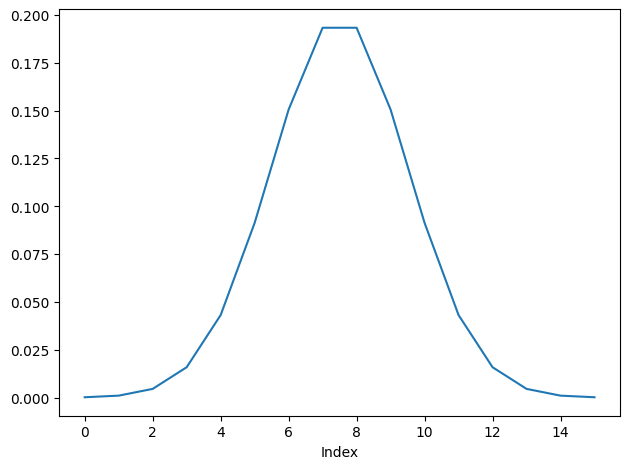

In [76]:
gaussian = scipy.signal.gaussian(M = 16, std = 2)
gaussian /= sum(gaussian)
plt.plot(gaussian)
decorate(xlabel = 'Index')

Выполним ДПФ гаусовой кривой:

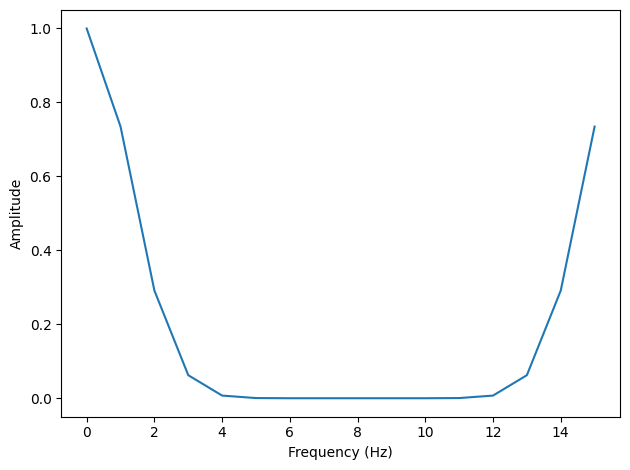

In [77]:
fft_gaussian = np.fft.fft(gaussian)
plt.plot(abs(fft_gaussian))
decorate(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude')

Соедением края ДПФ, чтобы получить подобие гаусова распределения:

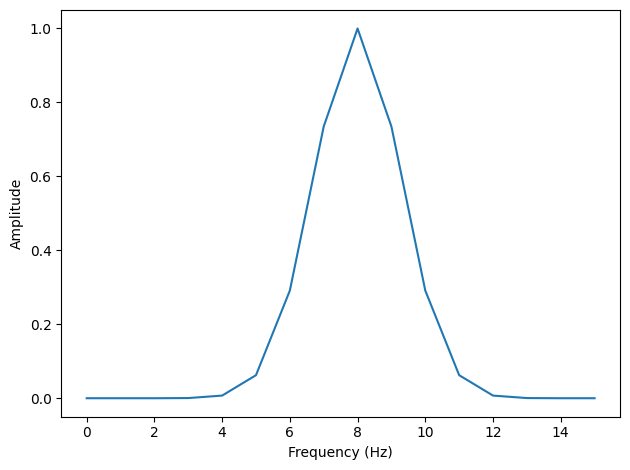

In [78]:
N = len(gaussian)
fft_rolled = np.roll(fft_gaussian, N//2)
plt.plot(abs(fft_rolled))
decorate(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude')

Увеличим std, чтобы увидеть как это сказывается на кривой и её ДПФ:

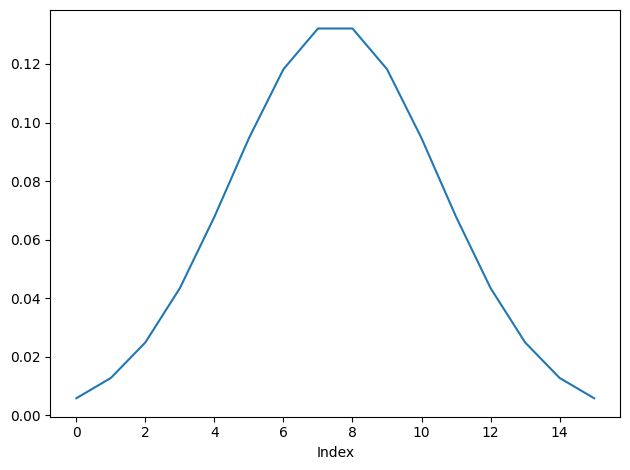

In [79]:
gaussian1 = scipy.signal.gaussian(M = 16, std = 3)
gaussian1 /= sum(gaussian1)
plt.plot(gaussian1)
decorate(xlabel = 'Index')

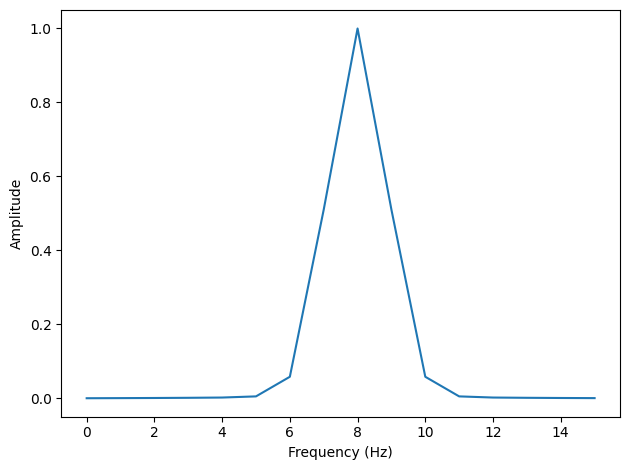

In [80]:
fft_gaussian1 = np.fft.fft(gaussian1)
N = len(gaussian1)
fft_rolled1 = np.roll(fft_gaussian1, N//2)
plt.plot(abs(fft_rolled1))
decorate(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude')

Видно, что увеличение ширины гаусова окна сужает его ДПФ.

Теперь уменьшим параметр std:

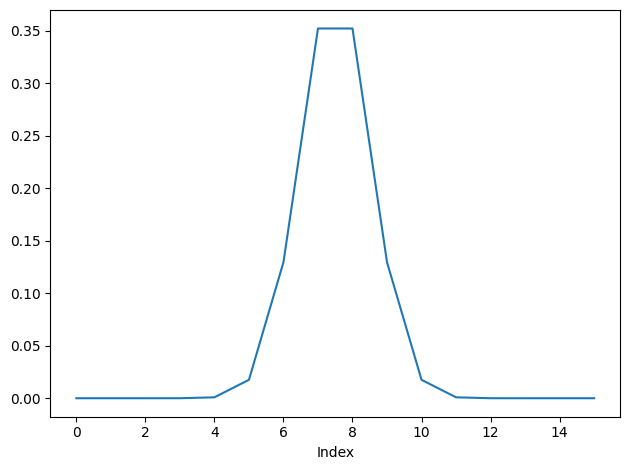

In [81]:
gaussian2 = scipy.signal.gaussian(M = 16, std = 1)
gaussian2 /= sum(gaussian2)
plt.plot(gaussian2)
decorate(xlabel = 'Index')

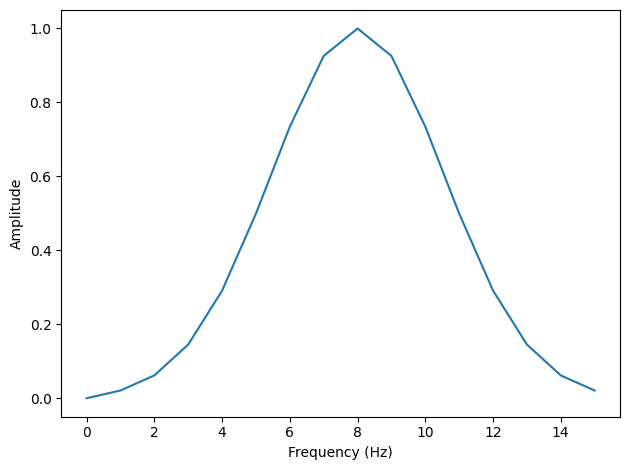

In [82]:
fft_gaussian2 = np.fft.fft(gaussian2)
N = len(gaussian2)
fft_rolled2 = np.roll(fft_gaussian2, N//2)
plt.plot(abs(fft_rolled2))
decorate(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude')

Таким образом, сужение гаусова окна привело к расширению его ДПФ.

Упражнение 8.3

In [83]:
signal = SawtoothSignal(200)
wave = signal.make_wave(duration = 1.0, framerate = 44100)

Создадим окно Хемминга и сравним его с Гаусовым окном с std = 3:

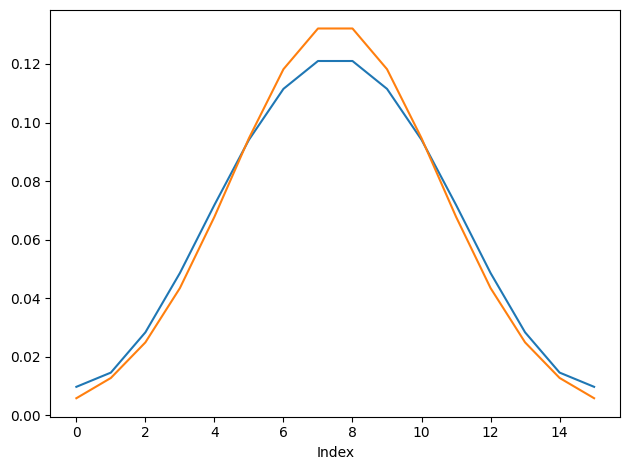

In [84]:
hamming = np.hamming(16)
hamming /= sum(hamming)
plt.plot(hamming)
plt.plot(gaussian1)
decorate(xlabel = 'Index')

Сравним их ДПФ в логарифмическом масштабе:

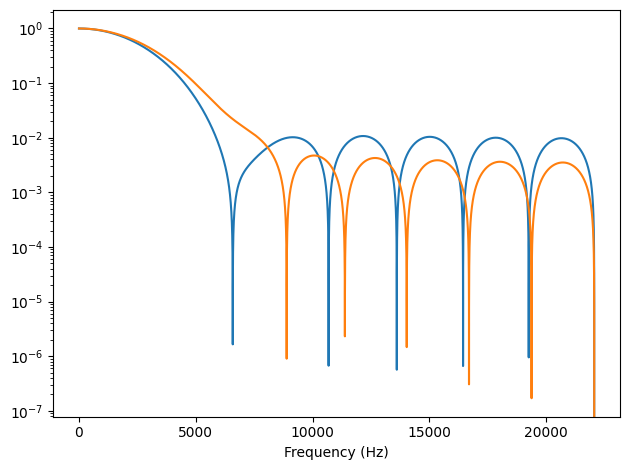

In [85]:
paddedH = zero_pad(hamming, len(wave))
paddedG = zero_pad(gaussian1, len(wave))
dft_hamming = np.fft.rfft(paddedH)
dft_gaussian1 = np.fft.rfft(paddedG)
plt.plot(abs(dft_hamming))
plt.plot(abs(dft_gaussian1))
decorate(xlabel = 'Frequency (Hz)', yscale = 'log')

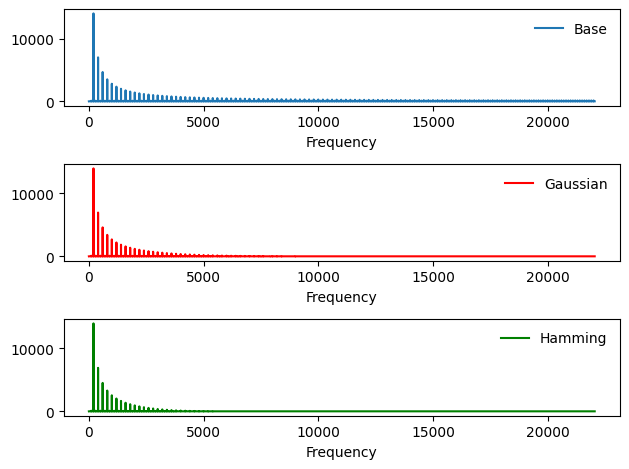

In [102]:
ysG = np.convolve(wave.ys, gaussian, mode = 'same')
ysH = np.convolve(wave.ys, hamming, mode = 'same')
smoothG =  Wave(ysG, framerate = wave.framerate)
smoothH =  Wave(ysH, framerate = wave.framerate)
spectrum = wave.make_spectrum()
spectrumG = smoothG.make_spectrum()
spectrumH = smoothH.make_spectrum()

plt.subplot(3, 1, 1)
spectrum.plot(label = "Base")
decorate(xlabel = 'Frequency')

plt.subplot(3, 1, 2)
spectrumG.plot(color = "red", label = "Gaussian")
decorate(xlabel = 'Frequency')

plt.subplot(3, 1, 3)
spectrumH.plot(color = "green", label = "Hamming")
decorate(xlabel = 'Frequency')
plt.show()

На графиках видно, что окно Хэмминга больше подходит для фильтра НЧ, так как оно лучше гасит высокочастотные компоненты, чем Гаусово окно.